# Защита персональных данных

# Описание задачи

Необходимо защитить персональные данные клиентов компании. Для этого нужно разработать такой метод преобразования данных, чтобы по ним в итоге было сложно восстановить персональную информацию. После преобразования данных качество модели машинного обучения не должно ухудшиться. Предполагается использование метода линейной регрессии.

# План работы

1. Загрузка данных
2. Умножение матриц
3. Алгоритм преобразования
4. Проверка алгоритма

# Описание данных

* Признаки: пол, возраст, зарплата клиента, количество членов семьи клиента.
* Целевой признак: количество страховых выплат клиенту.

## Загрузка данных

In [35]:
# Импорт библиотек и функций
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [36]:
# Чтение таблицы данных
data = pd.read_csv('datasets/insurance.csv')

In [37]:
# Просмотр первых 5 строк таблицы данных
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [38]:
# Вывод сводной информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [39]:
# Выделение в таблице основных признаков и целевого
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

## Умножение матриц

Для защиты данных используем умножение признаков на обратимую матрицу. Проверим, изменится ли качество линейной регрессии после умножения.

**Обозначения:**

Здесь будут использованы следующие обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Примечание.** Формулу предсказаний линейной регрессии используем в упрощённом виде $ a = Xw $, который получается, если в матрицу $X$ добавить нулевой столбец, состоящий только из единиц, а к вектору $w$ добавить нулевой элемент со значением $w0$

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Решение:** 
Возьмём формулу обучения и подставим вместо матрицы признаков X произведение признаков на обратимую матрицу P, то есть XP

$$
w_{XP} = ((XP)^T XP)^{-1} (XP)^T y = (P^{T}X^{T}XP)^{-1}P^{T}X^{T} y = P^{-1}(P^TX^TX)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$$

Возьмём формулу вектора предсказаний и подставим в неё вместо матрицы признаков X произведение признаков на обратимую матрицу P и результат преобразования на предыдущем шаге

$$
a_{XP} = (XP)w_{XP} = XPP^{-1}w = Xw = a
$$

**Вывод:** Качество линейной регрессии не изменится. Для преобразования данных можно использовать умножение признаков на обратимую матрицу.




## Алгоритм преобразования

Для преобразования данных будет использовано умножение матрицы признаков на произвольную обратимую матрицу. При этом качество модели машинного обучения не должно ухудшиться.

* На первом шаге создаётся произвольная обратимая матрица $P$.
* На втором шаге проверяется обратимость созданной матрицы $P$.
* На третьем шаге создаются два класса линейной регрессии - класс линейной регрессии без преобразования и класс линейной регрессии с преобразованием, в котором матрица $X$ умножается на обратимую матрицу $P$. В каждом классе выполняется вычисление вектора весов линейной регрессии $w$ по формуле $w = (X^T X)^{-1} X^T y$
* На четвертом шаге с использованием созданных классов определяются и сравниваются метрики качества линейной регрессии без преобразования и линейной регрессии с преобразованием.

## Проверка алгоритма

In [40]:
# Формирование матрицы признаков с нулевым столбцом состоящим только из единиц
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)

In [41]:
# Вектор целевого признака
y = target

In [42]:
# Произвольная обратимая матрица
P = np.array([[2, -1, -3, 1, 0],
            [-1, -2, 0, 3, -2],
            [-2, 0, 2, -2, 1],
            [0, -2, 0, 3, -2],
            [1, 0, -1, 2, 1]])

In [43]:
# Проверка возможности вычисления обратной матрицы
np.linalg.inv(P)

array([[-8.32667268e-17, -1.00000000e+00, -1.11022302e-16,
         1.00000000e+00,  1.73472348e-17],
       [-4.19354839e-01,  4.19354839e-01, -6.12903226e-01,
        -7.09677419e-01,  3.22580645e-02],
       [-2.58064516e-01, -7.41935484e-01,  1.61290323e-01,
         8.70967742e-01,  9.67741935e-02],
       [-1.93548387e-01,  1.93548387e-01, -1.29032258e-01,
        -9.67741935e-02,  3.22580645e-01],
       [ 1.29032258e-01, -1.29032258e-01,  4.19354839e-01,
         6.45161290e-02,  4.51612903e-01]])

Обратимость матрицы $P$ можно также проверить с помощью её определителя: У обратимой матрицы определитель не должен быть равен нулю.

In [45]:
# Определитель матрицы
np.linalg.det(P)

-31.0

In [10]:
#Класс линейной регрессии без преобразования
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, test_features):
        X = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        return X.dot(self.w)

In [11]:
# Класс линейной регрессии с преобразованием
class LinearRegression_secure:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        X = X.dot(P)
        y = train_target
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, test_features):
        X = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        X = X.dot(P)
        return X.dot(self.w)

In [12]:
#Определение качества линейной регрессии без преобразования
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286668


In [13]:
#Определение качества линейной регрессии с преобразованием
model = LinearRegression_secure()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286626154


**Вывод:** значение метрики R2 до преобразования признаков совпадает со значением R2 после преобразования. Качество модели линейной регрессии после преобразования признаков не меняется, следовательно качество модели машинного обучения не ухудшилось.

## Вывод

Для защиты персональных данных был применён метод преобразования, заключающийся в умножении матрицы признаков на произвольную обратимую матрицу. Качество модели машинного обучения после преобразования признаков не ухудшилось.

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Валерий, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Удачи в следующих проектах!!!
    
    
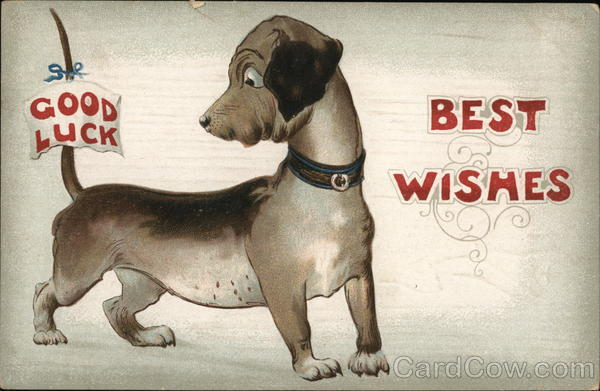    

</div>